In [ ]:
!pip install -q diffusers==0.3.0
!pip install -q transformers scipy ftfy
!pip install -q "ipywidgets>=7,<8"
!pip install opencv-python

In [ ]:
!pip install -q keras-cv
!pip install tk

In [ ]:
!apt install libcudnn8 -y

In [ ]:
!nvidia-smi

Thu Jul  6 16:02:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import keras_cv
import time
from tensorflow.keras import mixed_precision
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import io

In [ ]:
#setting up the model with XLA Complilation and without
model = keras_cv.models.StableDiffusion()
mixed_precision.set_global_policy("mixed_float16")
supermodel = keras_cv.models.StableDiffusion(jit_compile=True)#model with XLA Compilation

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


## Image generation without XLA Compilation

50/50 [==============================] - 59s 1s/step
Image generation took 60.25506663322449 seconds


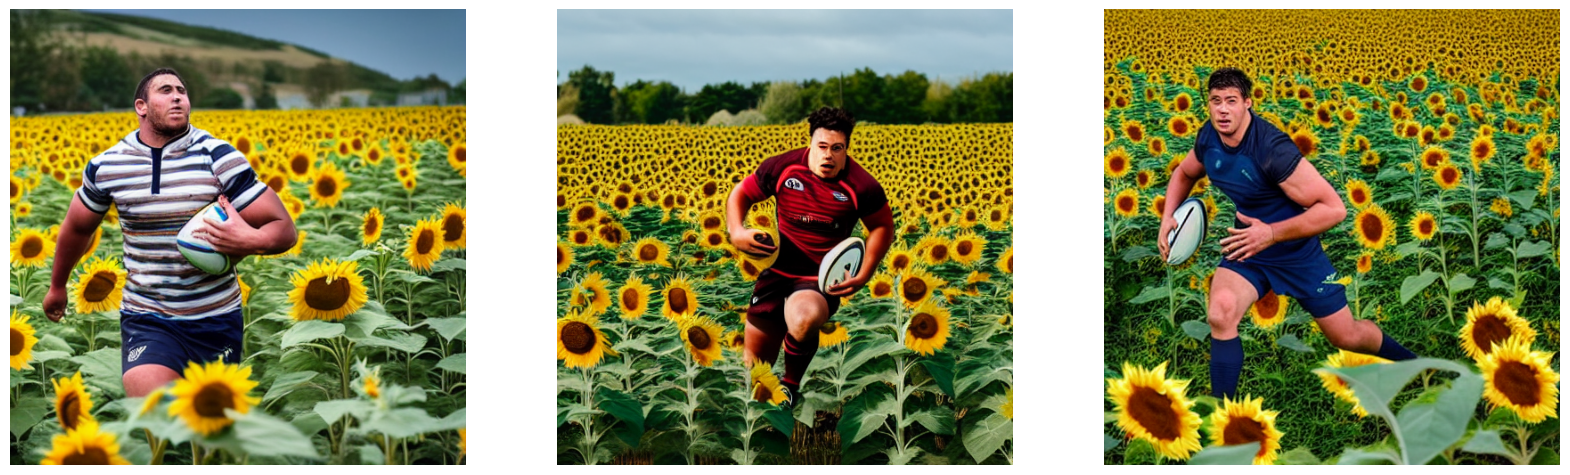

In [ ]:
start_time = time.time()
images = model.text_to_image(" a mordern rugby player running through a sunflower field with opponents trying to catch him",
                             batch_size=3)
end_time = time.time()

print(f"Image generation took {end_time - start_time} seconds")
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

## It takes 60secs Without XLA Compilation.

## With XLA Compilation

50/50 [==============================] - 41s 826ms/step
Image generation took 42.12928223609924 seconds


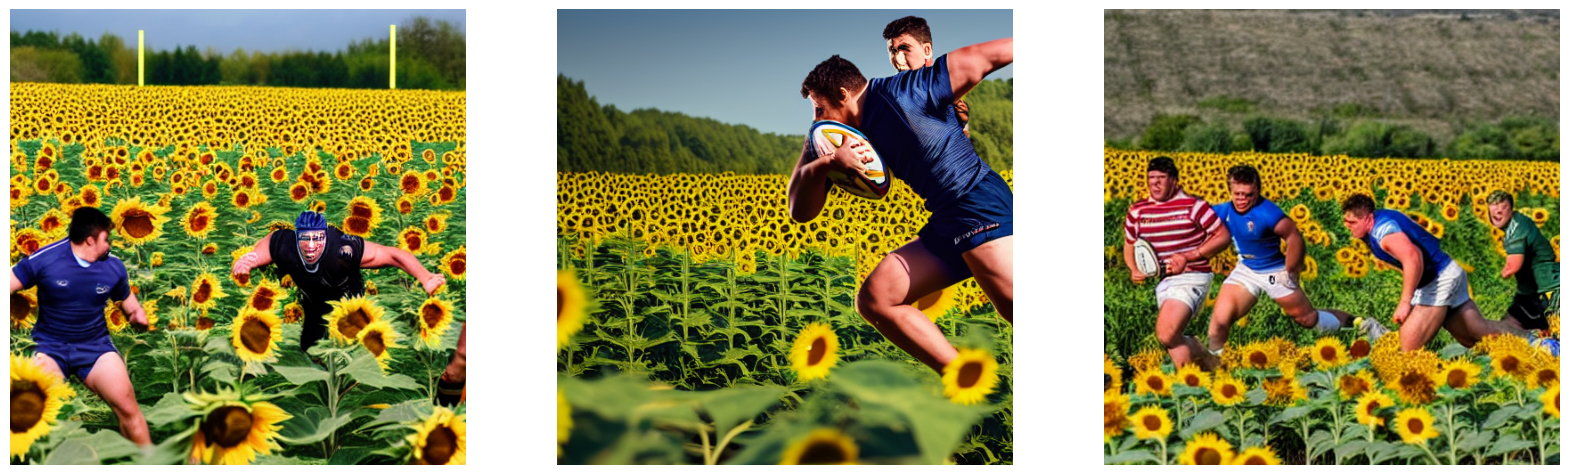

In [ ]:
start_time = time.time()
images = supermodel.text_to_image(" a mordern rugby player running through a sunflower field with opponents trying to catch him",
                             batch_size=3)
end_time = time.time()

print(f"Image generation took {end_time - start_time} seconds")
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

## It takes 42secs with XLA Compilation

50/50 [==============================] - 42s 835ms/step
Image generation took 42.58202290534973 seconds


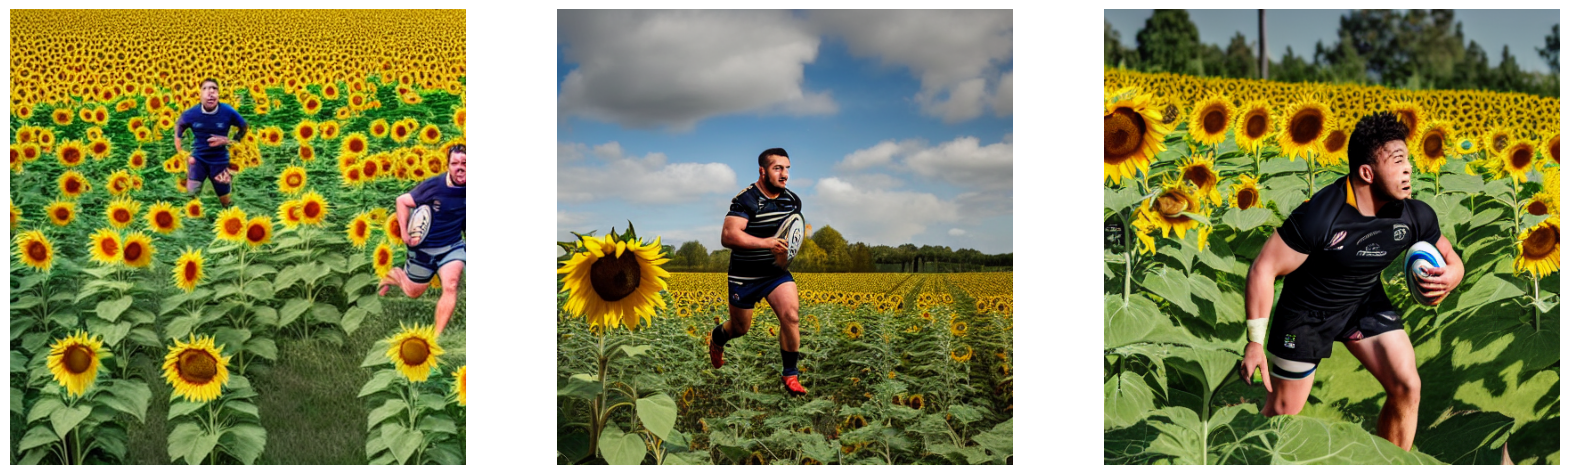

In [ ]:
start_time = time.time()
images = supermodel.text_to_image("a mordern rugby player running through a sunflower field with opponents trying to catch him",
                             batch_size=3,)
end_time = time.time()

print(f"Image generation took {end_time - start_time} seconds")
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

50/50 [==============================] - 41s 823ms/step


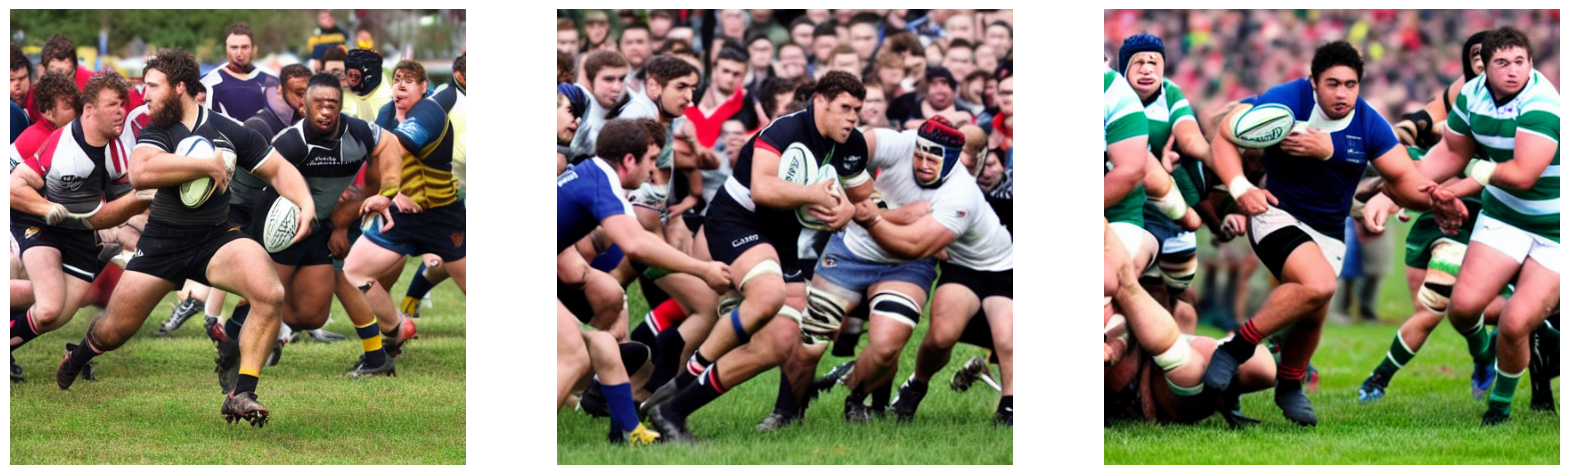

In [ ]:

images = supermodel.text_to_image("ca mordern rugby player running through a crowd of opponents trying to catch him",
                             batch_size=3)
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)